# DATA UNDERSTANDING
My data has 8124 records and contains 22 instances(columns). The columns are as follows;

`1.cap-shape` - This describes the overall shape of the mushroom's cap
* bell=b
* conical=c
* convex=x
* flat=f
* knobbed=k
* sunken=s

`2. cap-surface` - This describes the texture of the mushroom's cap surface.
* smooth=s
* scaly=y
* fibrous=f
* grooves=g

`3. cap-color` - This describes the color of the mushroom's cap
* brown=n
* buff=b
* gray=g
* orange=o
* purple=p
* red=r
* white=w
* yellow=y

`4. bruises` - This indicates whether or not the mushroom bruises when touched.
* yes=y
* no=n

`5. odor` - This describes the odor of the mushroom
* almond=a
* anise=l
* none=n
* pungent=p
* strong=s

`6. gill-attachment` - This describes how the gills (underside of the cap) are attached to the stem.
* attached=a
* free=f
* descending=d

`7. gill-spacing` - This describes how closely spaced the gills are.
* close=c
* crowded=w
* distant=d

`8. gill-size` - This describes the relative size of the gills.
* broad=n
* narrow=f

`9. gill-color` - This describes the color of the mushroom's gills.
* brown=n
* buff=b
* gray=g
* pink=p
* purple=r
* red=r
* white=w
* yellow=y.

`10. Stalk-shape` - This describes the shape of the mushroom's stalk.
* bulbous=b
* club=c
* equal=e
* rooting=r

`11. stalk-root` - This describes whether the base of the stalk has bulbous roots.
* bulbous=b
* club=c
* equal=e
* rooting=r

`12. stalk-surface-above-ring` - This describes whether the base of the stalk has bulbous roots.
* bulbous=b
* club=c
* equal=e
* rooting=r

`13. stalk-surface-below-ring` - This describes the texture of the stalk's surface below the ring.
* smooth=s
* scaly=y
* silky=k

`14. stalk-color-below-ring` - This describes the color of the stalk below the ring.
* brown=n
* buff=b
* gray=g
* orange=o
* pink=p
* red=r
* white=w
* yellow=y

`15.veil-type` - This describes the type of veil covering the gills.
* partial=p
* universal=u

`16. ring-number` - This describes the number of rings on the stalk.
* none=n
* one=o
* two=t

`17.ring-type` - This describes the type of ring on the stalk.
* large=l
* none=n
* persistent=p
* fleeting=s

`18. spore-print-color` - This describes the color of the spores produced by the mushroom.
* black=k
* brown=n
* buff=b
* purple=p
* white=w
* yellow=y

`19.population` - This describes how the mushrooms grow.
* clustered=c
* scattered=s
* solitary=s

`20.habitat` - This describes the typical habitat where the mushroom is found.
* grasses=g
* leaves=l
* meadows=m
* paths=p
* urban=u
* waste=w
* woods=d

This is a multi-class problem meaning that our target column  has two classes. The column is named `poisonous` and contains these values;
* p meaning poisonous
* e meaning edible


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from funct2 import sns_xcount, sns_ycount, multivariate_xcountplot, multivariate_ycountplot
import pandas as pd
#for importing data
import ucimlrepo


In [35]:
#importing data
from ucimlrepo import fetch_ucirepo
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
# metadata 
print(mushroom.metadata) 
# variable information 
print(mushroom.variables) 


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

My data is called `Mushroom`, the repo url and data url can also be seen on the metadata. I will print the data DataFrame to get a clear understanding of my data. I will use pandas methods to also manipulate the data

In [36]:
#printing df
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [37]:
#df info
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [38]:
#summary statistics
X.describe(include= "all")

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [39]:
#checking for null values
X.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

The `stalk_root` column has 2480 missing records. The rest of the columns are okay and have no missing records.

* Target variable

I will also try to understand our target  variable.

In [40]:
#print target
y

,poisonous
0,p
1,e
2,e
3,p
4,e
...,...
8119,e
8120,e
8121,e
8122,p


Has two classes `edible` and `poisonous`

In [41]:
#summary stats
y.describe()

,poisonous
count,8124
unique,2
top,e
freq,4208


`edible` class is the top class with 4208 instances

In [42]:
#checking for null values
y.isnull().sum()

poisonous    0
dtype: int64

Our target variable has zero missing values
## 2. EXPLORATORY DATA ANALYSIS(EDA)
Here we do some exploratory analysis using the powerful visualization tools provided by Python to understand our data better. Exploratory data analysis (EDA) is all about unveiling the initial characteristics of a dataset. We'll be using these tools to get a sense of the data's distribution, identify any missing values or outliers, and potentially uncover interesting relationships between the variables. This initial exploration will guide us in choosing the right direction for further analysis and cleaning.
### 2.1 Univariate  Analysis: Exploring the variables individually
 * `2.1.1 Target(poisonous)`
 First I will visualize our target column to get a visual feeling of how it looks like.

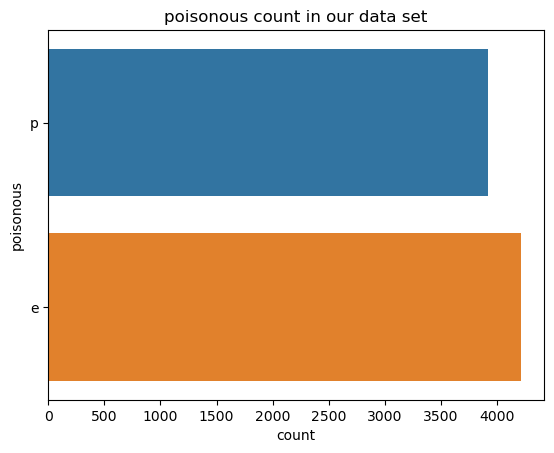

In [44]:
sns_ycount("poisonous", y)

Our target variable has two classes namely, poisonous and edible. The classes are almost balanced with the edible class only exceeding the poisonous class by 292. Class imbalance shouldn't be a problem in our analysis since our the margin between the two classes is not that big.

* `2.1.2 X(Our predictor variables)`

1. `cap-shape`

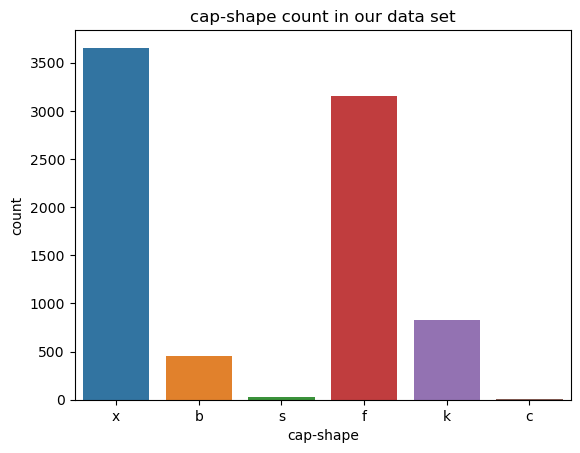

In [46]:
sns_xcount("cap-shape", X)

Most mushrooms have a convex(x) and flat(f) shape which are represented by the blue and maroon bar respectively. The conical(c) and sunken(s) shapes have the least numbers.

`2. cap-surface`

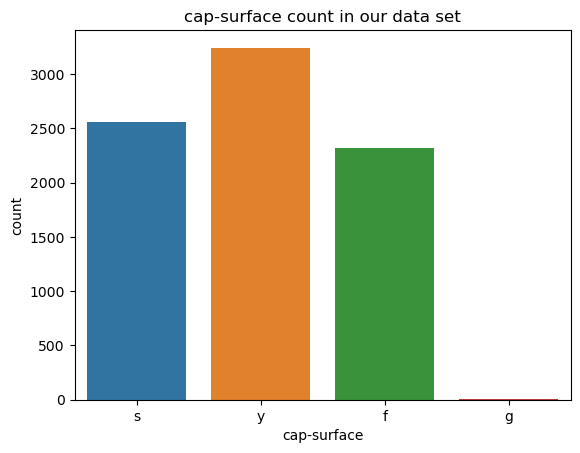

In [49]:
sns_xcount("cap-surface", X)

I have mushrooms with scaly cap surface(y) topping my data set with more than 3000 records. Mushrooms with smooth(s) and fibrous(f) cap-surfaces also appear in high numbers each having almost 2500 and 2300 records each. Mushrooms with the groove cap surface are the least appearing

`3 cap-color`